In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect('InternetSpeed.db')

In [3]:
cur = conn.cursor()

In [4]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10;'

In [5]:
cur.execute(query)

In [6]:
for row in cur:
    print(row)

('2016-12-01 14:30:00.000000',)
('2016-11-24 07:00:00.000000',)
('2016-11-27 15:30:00.000000',)
('2016-11-29 13:00:00.000000',)
('2016-12-09 23:00:00.000000',)
('2016-11-29 09:30:00.000000',)
('2016-11-23 18:00:00.000000',)
('2016-11-28 08:30:00.000000',)
('2016-12-13 09:00:00.000000',)
('2016-11-28 05:30:00.000000',)


In [7]:
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1;'
cur.execute(query)

In [8]:
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [9]:
columns = [member[0] for member in cur.description]
columns = columns[1:]

In [10]:
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]
columns = list(set(columns))

In [11]:
columns[:10]

['E07000081',
 'E08000029',
 'E06000013',
 'E06000014',
 'E07000048',
 'E08000036',
 'E08000019',
 'E07000108',
 'E08000011',
 'E07000051']

In [12]:
area = columns[0]
print(area)

E07000081


In [13]:
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
print(suffix.keys())
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000081')

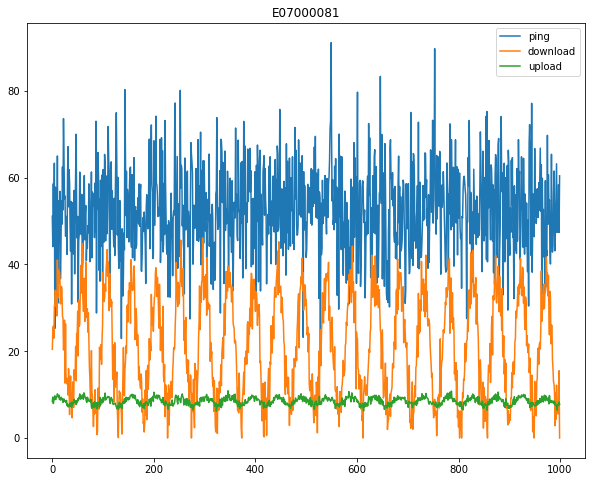

In [14]:
area = columns[0]
plt.figure(figsize=(10, 8))
for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime;'.format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)